In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from sqlalchemy import create_engine, text, inspect, func
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from pathlib import Path

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
connection=engine.connect()
# reflect the tables
hawaii_measurement_df=pd.read_sql('''SELECT * FROM measurement''',connection)
hawaii_station_df=pd.read_sql('''SELECT * FROM station''',connection)

In [37]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station=Base.classes.station

In [9]:
## Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
##Find the most recent date in the data set.
query1=session.query(func.min(measurement.date))
for query in query1:
    print(query)

('2010-01-01',)


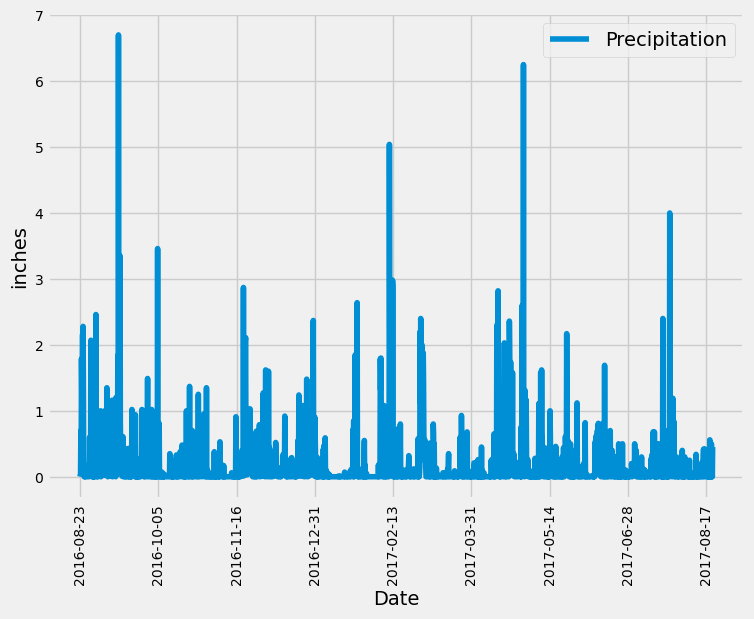

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
query_maxdate=session.query(func.max(measurement.date)).first()
# Calculate the date one year from the last date in data set.
maxdate = datetime.strptime(query_maxdate[0], '%Y-%m-%d')
year_before_temp=maxdate-relativedelta(years=1)
year_before=year_before_temp.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
results=session.query(measurement.date,measurement.prcp).\
    filter(measurement.date>=year_before).all()
measurement_date_list=[]
measurement_prcp_list=[]
for result in results:
    (measurement_date,measurement_prcp)=result
    measurement_date_list.append(measurement_date)
    measurement_prcp_list.append(measurement_prcp)
results_dict={'Date':measurement_date_list,'Precipitation':measurement_prcp_list}

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df=pd.DataFrame(results_dict)
results_df=results_df.dropna()
# Sort the dataframe by date
results_df=results_df.sort_values(by=['Date']).set_index('Date')

# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot(figsize=(8,6), fontsize=10,rot=90)
plt.xlabel("Date")
plt.ylabel("inches")

plt.savefig("Precipitation.png")
plt.show()

In [66]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [17]:
# Close Session
session.close()